In [1]:
# Import Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/Users/musaidriss/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Only get the data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

720574    133285.0
8192      115000.0
784882     87500.0
252530     90000.0
246222     75000.0
746630     80000.0
664960     90000.0
530527     90000.0
744650     82500.0
406879     62500.0
Name: salary_year_avg, dtype: float64

<Axes: >

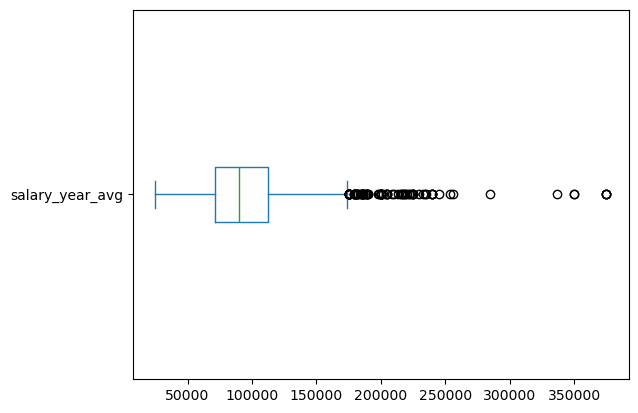

In [7]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)
# could do plt.boxplot(df_DA_US['salary_year_avg']) as well

/var/folders/mc/f38vxxz110q2vyy1qcfk60j40000gn/T/ipykernel_46421/1385449848.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


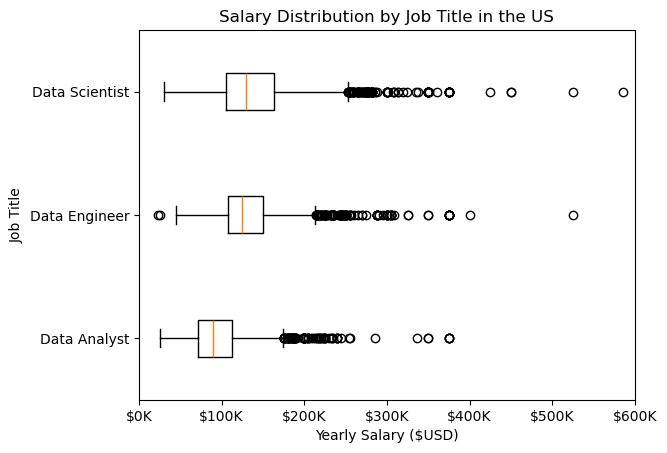

In [15]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter the data to appropriate job titles
# Only get the data analyst jobs 
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [
    df_US[df_US['job_title_short'] == job_title]['salary_year_avg']
    for job_title in job_titles
]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution by Job Title in the US')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('Job Title')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()